<a href="https://colab.research.google.com/drive/1sBdRzNt-fn61kF3I_I6yLY11I3HSQk8M?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 1**
---
[voice.csv](https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2Fv7RHnCSAbQRjwJX7o36o%2Fvoice.csv?alt=media&token=d5bad3d3-e5c4-4515-803c-bb4ea198fda9)
1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara `male` dan `female` pada dataset `voice.csv`.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

**Import Data**

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Preprocessing Data**

In [ ]:
# Encode label: male = 0, female = 1
df['label'] = LabelEncoder().fit_transform(df['label'])

# Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# Normalisasi (karena KNN sensitif terhadap skala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data train-test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data train:", X_train.shape)
print("Data test:", X_test.shape)

Data train: (2534, 20)
Data test: (634, 20)


**Mencari Nilai K Terbaik untuk KNN**

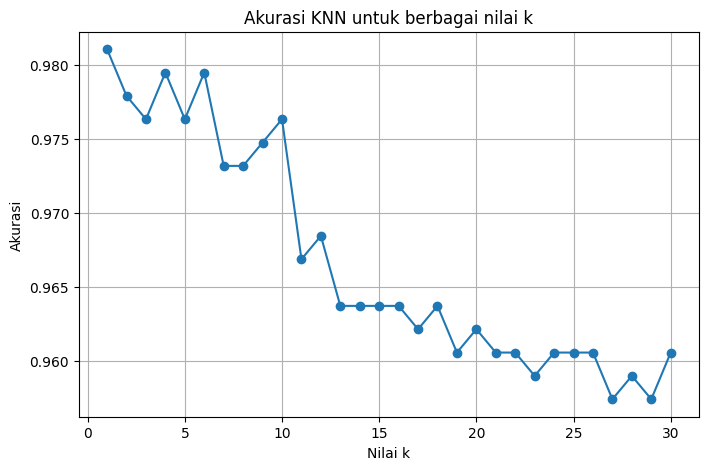

Nilai k terbaik: 1, dengan akurasi: 0.9811


In [ ]:
# Coba beberapa nilai k
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot grafik akurasi terhadap nilai k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Akurasi KNN untuk berbagai nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Nilai k terbaik
best_k = k_values[np.argmax(accuracy_scores)]
best_acc = max(accuracy_scores)
print(f"Nilai k terbaik: {best_k}, dengan akurasi: {best_acc:.4f}")

**Analisis Fitur Optimal (Feature Selection)**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_best = KNeighborsClassifier(n_neighbors=best_k)
sfs = SequentialFeatureSelector(
    knn_best,
    n_features_to_select=8,
    direction='forward',     # atau 'backward'
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
sfs.fit(X_train, y_train)

# Dapatkan nama fitur
try:
    feature_names = X.columns
except AttributeError:
    feature_names = bow.get_feature_names_out()  # dari CountVectorizer/TfidfVectorizer

mask = sfs.get_support()
selected_features = feature_names[mask]
print("Fitur terbaik:", list(selected_features))

Fitur terbaik: ['sd', 'median', 'Q25', 'IQR', 'kurt', 'mode', 'meanfun', 'dfrange']


**Uji Ulang dengan Fitur Terpilih**

Akurasi dengan fitur terpilih (8 fitur): 0.9842

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       317
        spam       0.98      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



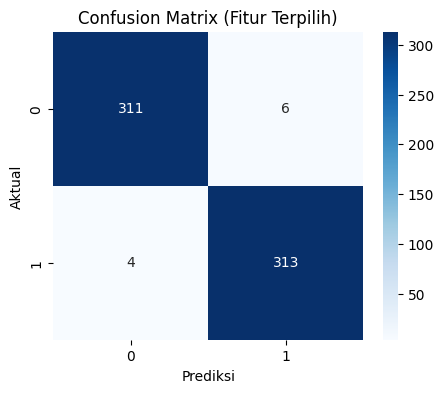

Fitur terbaik: ['sd', 'median', 'Q25', 'IQR', 'kurt', 'mode', 'meanfun', 'dfrange']


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Fit selector
knn_best = KNeighborsClassifier(n_neighbors=best_k)
sfs = SequentialFeatureSelector(
    knn_best,
    n_features_to_select=8,
    direction='forward',   # atau 'backward'
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
sfs.fit(X_train, y_train)

# 2) Mask fitur terpilih (gunakan get_support() — bekerja untuk semua selector)
mask = sfs.get_support()

# 3) Subset fitur
X_train_sel = X_train[:, mask]
X_test_sel  = X_test[:, mask]

# 4) Retrain KNN dengan fitur terpilih
knn_sel = KNeighborsClassifier(n_neighbors=best_k)
knn_sel.fit(X_train_sel, y_train)
y_pred_sel = knn_sel.predict(X_test_sel)

# 5) Evaluasi
acc_sel = accuracy_score(y_test, y_pred_sel)
print(f"Akurasi dengan fitur terpilih ({mask.sum()} fitur): {acc_sel:.4f}")

# Sesuaikan nama kelas dengan label Anda (mis. ['ham','spam'] bila 0=ham, 1=spam)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sel, target_names=['ham','spam']))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_sel), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Fitur Terpilih)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 6) Nama fitur (jika dari vectorizer)
try:
    feature_names = X.columns
except AttributeError:
    feature_names = bow.get_feature_names_out()

selected_features = np.array(feature_names)[mask]
print("Fitur terbaik:", list(selected_features))